In [78]:
import numpy as np
import pandas as pd
import re
from datetime import datetime as dt
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
from PyPDF2 import PdfFileMerger
path_file = ('D:\\Laura_Rojas_Gonzalez\\JI_4DAir\\Plataforma\\')
sys.path.append(path_file)
from datamanager_updated import DataManager

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [3]:
#Llamamos los datos de la simple
# Datamanager = DataManager(f'D:\\Laura_Rojas_Gonzalez\\JI_4DAir\\Pruebas\\dos\\')
df_S4 = pd.read_csv('D:\\Laura_Rojas_Gonzalez\\JI_4DAir\\Pruebas\\dos\\datas4.csv')
df_S4['Date']=df_S4['Fecha']+" "+df_S4["Hora"]
df_S4.drop("Fecha", axis=1,inplace=True)
df_S4.drop("Hora", axis=1, inplace=True)
df_S4.drop("Unnamed: 12", axis=1, inplace=True)
df_S4.drop("Unnamed: 13", axis=1, inplace=True)

In [4]:
df_S4["Date"] = pd.to_datetime(df_S4["Date"])
df_S4["Date"] = pd.to_datetime(df_S4["Date"]).dt.floor('min')

In [5]:
# df_S4_user.set_index("Date", inplace=True)
df_S4.set_index("Date", inplace=True)

In [6]:
#Llamamos los datos de la vaisala
#Obtenemos una lista del nombre de los archivos dentro de la carpeta
path_vaisala = f'D:\\Laura_Rojas_Gonzalez\\JI_4DAir\\Vaisala\\2023\\Comp_Simple\\'
list_name = os.listdir(path_vaisala)

#Iteramos para abrir cada archivo y concatenamos para tener un solo df
df_vaisala = []
for file in list_name:
    load_file = pd.read_csv(f'{path_vaisala}{file}')
    df_vaisala.append(load_file)
df_vaisala = pd.concat(df_vaisala)
df_vaisala=df_vaisala.dropna()
df_vaisala.reset_index(drop=True, inplace=True)
df_vaisala.drop("Uptime (s)", axis=1, inplace=True)

In [7]:
df_vaisala['Date'] = (df_vaisala['Date'].str[:10] +' ' +df_vaisala['Date'].str[11:17] +'00')

In [8]:
df_vaisala['Date']=pd.to_datetime(df_vaisala['Date'])
# df_vaisala["Date"] = df_vaisala["Date"].dt.strftime('%Y-%m-%d %H:%M:%S')

In [9]:
df_vaisala.set_index("Date", drop=True, inplace=True)

In [10]:
df_S4_new = df_S4["2023-09-15":"2023-09-20"]

In [11]:
df_vaisala_new = df_vaisala["2023-09-15":"2023-09-20"]

In [12]:
df_vaisa_new = df_vaisala_new.resample('H').mean()
df_vaisa_new.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)

In [33]:
df_S4_new.rename(columns={"Temperatura [°C]": "TEMP (C)", "Humedad [%HR]": "HUM (%RH)"}, inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [41]:
df_vaisa_new.head()

,NO2 (ug/m3),CO (ug/m3),O3 (ug/m3),NO (ug/m3),TEMP (C),HUM (%RH),PRES (hPa)
Date,,,,,,,
2023-09-15 00:00:00,118.988333,1180.035000,58.866667,65.393333,23.028333,57.090000,850.530000
2023-09-15 01:00:00,101.438333,1033.811667,67.686667,65.030000,22.298333,59.736667,851.248333
2023-09-15 02:00:00,98.825000,1160.680000,66.740000,80.940000,21.946667,62.456667,851.960000
2023-09-15 03:00:00,86.036667,1215.983333,79.453333,86.436667,22.030000,63.151667,852.195000
2023-09-15 04:00:00,83.583333,1284.496667,84.020000,93.458333,21.551667,68.853333,851.700000


In [83]:
df_vaisa_new.head()

,NO2 (ug/m3),CO (ug/m3),O3 (ug/m3),NO (ug/m3),TEMP (C),HUM (%RH),PRES (hPa),NO2 [ppm],NO [ppm],CO [ppm],O3 [ppm]
Date,,,,,,,,,,,
2023-09-15 00:00:00,118.988333,1180.035000,58.866667,65.393333,23.028333,57.090000,850.530000,0.063292,0.053165,1.026117,0.030034
2023-09-15 01:00:00,101.438333,1033.811667,67.686667,65.030000,22.298333,59.736667,851.248333,0.053957,0.052870,0.898967,0.034534
2023-09-15 02:00:00,98.825000,1160.680000,66.740000,80.940000,21.946667,62.456667,851.960000,0.052566,0.065805,1.009287,0.034051
2023-09-15 03:00:00,86.036667,1215.983333,79.453333,86.436667,22.030000,63.151667,852.195000,0.045764,0.070274,1.057377,0.040537
2023-09-15 04:00:00,83.583333,1284.496667,84.020000,93.458333,21.551667,68.853333,851.700000,0.044459,0.075982,1.116954,0.042867


In [13]:
def ppm_to_ugm3(concentration, gas="NH3"):
    convert = {"NH3": 700, "CO": 1150, "NO": 1230, "NO2": 1880, "NOx": 1912, "O3": 1960}
    if gas in convert:
        result =  concentration*convert[gas]
    return result

def ugm3_to_ppm(concentration, gas="NH3"):
    convert = {"NH3": 700, "CO": 1150, "NO": 1230, "NO2": 1880, "NOx": 1912, "O3": 1960}
    if gas in convert:
        result =  concentration/convert[gas]
    return result

In [43]:
# NO2	CO	O3	NO
df_vaisa_new["NO2 [ppm]"] = ugm3_to_ppm(df_vaisa_new["NO2 (ug/m3)"], "NO2")
df_vaisa_new["NO [ppm]"] = ugm3_to_ppm(df_vaisa_new["NO (ug/m3)"], "NO")
df_vaisa_new["CO [ppm]"] = ugm3_to_ppm(df_vaisa_new["CO (ug/m3)"], "CO")
df_vaisa_new["O3 [ppm]"] = ugm3_to_ppm(df_vaisa_new["O3 (ug/m3)"], "O3")

In [37]:
df_S4_new["NO2 (ug/m3)"] = df_S4_new["NO2 (ug/m3)"]/1000
df_S4_new["O3 (ug/m3)"] = df_S4_new["O3 (ug/m3)"]/1000

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
df_S4_new["NO2 [ppm]"]=df_S4_new["NO2 [ppm]"]/1000
df_S4_new["O3 [ppm]"]=df_S4_new["O3 [ppm]"]/1000

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
df_S4_new["CO (ug/m3)"] = ppm_to_ugm3(df_S4_new["CO [ppm]"], "CO")
df_S4_new["NO2 (ug/m3)"] = ppm_to_ugm3(df_S4_new["NO2 [ppm]"], "NO2")
df_S4_new["NOx (ug/m3)"] = ppm_to_ugm3(df_S4_new["NOx [ppm]"], "NOx")
df_S4_new["O3 (ug/m3)"] = ppm_to_ugm3(df_S4_new["O3 [ppm]"], "O3")

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

In [81]:
Datamanager = DataManager(dataframe=df_vaisa_new)
df_b38 = Datamanager.load_data()

entre


In [82]:
Datamanager.show_period(df_b38)

La fecha inicial del conjunto de datos es 2023-09-15 00:00:00
La fecha final del conjunto de datos es 2023-09-20 17:00:00
No es clara la frecuencia. La frecuencia inicial es 0 minutos
El rango de datos es de: 5 days 17:00:00
El dataset tiene en total 138 registros 
El dataset no tiene datos repetidos
Los datos están incompletos, hay que reindexar
Los datos faltantes son
2023-09-15 00:01:00
2023-09-15 00:02:00
2023-09-15 00:03:00
2023-09-15 00:04:00
2023-09-15 00:05:00
2023-09-15 00:06:00
2023-09-15 00:07:00
2023-09-15 00:08:00
2023-09-15 00:09:00
2023-09-15 00:10:00
2023-09-15 00:11:00
2023-09-15 00:12:00
2023-09-15 00:13:00
2023-09-15 00:14:00
2023-09-15 00:15:00
2023-09-15 00:16:00
2023-09-15 00:17:00
2023-09-15 00:18:00
2023-09-15 00:19:00
2023-09-15 00:20:00
2023-09-15 00:21:00
2023-09-15 00:22:00
2023-09-15 00:23:00
2023-09-15 00:24:00
2023-09-15 00:25:00
2023-09-15 00:26:00
2023-09-15 00:27:00
2023-09-15 00:28:00
2023-09-15 00:29:00
2023-09-15 00:30:00
2023-09-15 00:31:00
2023-09

2023-09-16 02:20:00
2023-09-16 02:21:00
2023-09-16 02:22:00
2023-09-16 02:23:00
2023-09-16 02:24:00
2023-09-16 02:25:00
2023-09-16 02:26:00
2023-09-16 02:27:00
2023-09-16 02:28:00
2023-09-16 02:29:00
2023-09-16 02:30:00
2023-09-16 02:31:00
2023-09-16 02:32:00
2023-09-16 02:33:00
2023-09-16 02:34:00
2023-09-16 02:35:00
2023-09-16 02:36:00
2023-09-16 02:37:00
2023-09-16 02:38:00
2023-09-16 02:39:00
2023-09-16 02:40:00
2023-09-16 02:41:00
2023-09-16 02:42:00
2023-09-16 02:43:00
2023-09-16 02:44:00
2023-09-16 02:45:00
2023-09-16 02:46:00
2023-09-16 02:47:00
2023-09-16 02:48:00
2023-09-16 02:49:00
2023-09-16 02:50:00
2023-09-16 02:51:00
2023-09-16 02:52:00
2023-09-16 02:53:00
2023-09-16 02:54:00
2023-09-16 02:55:00
2023-09-16 02:56:00
2023-09-16 02:57:00
2023-09-16 02:58:00
2023-09-16 02:59:00
2023-09-16 03:01:00
2023-09-16 03:02:00
2023-09-16 03:03:00
2023-09-16 03:04:00
2023-09-16 03:05:00
2023-09-16 03:06:00
2023-09-16 03:07:00
2023-09-16 03:08:00
2023-09-16 03:09:00
2023-09-16 03:10:00


2023-09-16 20:43:00
2023-09-16 20:44:00
2023-09-16 20:45:00
2023-09-16 20:46:00
2023-09-16 20:47:00
2023-09-16 20:48:00
2023-09-16 20:49:00
2023-09-16 20:50:00
2023-09-16 20:51:00
2023-09-16 20:52:00
2023-09-16 20:53:00
2023-09-16 20:54:00
2023-09-16 20:55:00
2023-09-16 20:56:00
2023-09-16 20:57:00
2023-09-16 20:58:00
2023-09-16 20:59:00
2023-09-16 21:01:00
2023-09-16 21:02:00
2023-09-16 21:03:00
2023-09-16 21:04:00
2023-09-16 21:05:00
2023-09-16 21:06:00
2023-09-16 21:07:00
2023-09-16 21:08:00
2023-09-16 21:09:00
2023-09-16 21:10:00
2023-09-16 21:11:00
2023-09-16 21:12:00
2023-09-16 21:13:00
2023-09-16 21:14:00
2023-09-16 21:15:00
2023-09-16 21:16:00
2023-09-16 21:17:00
2023-09-16 21:18:00
2023-09-16 21:19:00
2023-09-16 21:20:00
2023-09-16 21:21:00
2023-09-16 21:22:00
2023-09-16 21:23:00
2023-09-16 21:24:00
2023-09-16 21:25:00
2023-09-16 21:26:00
2023-09-16 21:27:00
2023-09-16 21:28:00
2023-09-16 21:29:00
2023-09-16 21:30:00
2023-09-16 21:31:00
2023-09-16 21:32:00
2023-09-16 21:33:00


2023-09-17 15:50:00
2023-09-17 15:51:00
2023-09-17 15:52:00
2023-09-17 15:53:00
2023-09-17 15:54:00
2023-09-17 15:55:00
2023-09-17 15:56:00
2023-09-17 15:57:00
2023-09-17 15:58:00
2023-09-17 15:59:00
2023-09-17 16:01:00
2023-09-17 16:02:00
2023-09-17 16:03:00
2023-09-17 16:04:00
2023-09-17 16:05:00
2023-09-17 16:06:00
2023-09-17 16:07:00
2023-09-17 16:08:00
2023-09-17 16:09:00
2023-09-17 16:10:00
2023-09-17 16:11:00
2023-09-17 16:12:00
2023-09-17 16:13:00
2023-09-17 16:14:00
2023-09-17 16:15:00
2023-09-17 16:16:00
2023-09-17 16:17:00
2023-09-17 16:18:00
2023-09-17 16:19:00
2023-09-17 16:20:00
2023-09-17 16:21:00
2023-09-17 16:22:00
2023-09-17 16:23:00
2023-09-17 16:24:00
2023-09-17 16:25:00
2023-09-17 16:26:00
2023-09-17 16:27:00
2023-09-17 16:28:00
2023-09-17 16:29:00
2023-09-17 16:30:00
2023-09-17 16:31:00
2023-09-17 16:32:00
2023-09-17 16:33:00
2023-09-17 16:34:00
2023-09-17 16:35:00
2023-09-17 16:36:00
2023-09-17 16:37:00
2023-09-17 16:38:00
2023-09-17 16:39:00
2023-09-17 16:40:00


2023-09-18 15:05:00
2023-09-18 15:06:00
2023-09-18 15:07:00
2023-09-18 15:08:00
2023-09-18 15:09:00
2023-09-18 15:10:00
2023-09-18 15:11:00
2023-09-18 15:12:00
2023-09-18 15:13:00
2023-09-18 15:14:00
2023-09-18 15:15:00
2023-09-18 15:16:00
2023-09-18 15:17:00
2023-09-18 15:18:00
2023-09-18 15:19:00
2023-09-18 15:20:00
2023-09-18 15:21:00
2023-09-18 15:22:00
2023-09-18 15:23:00
2023-09-18 15:24:00
2023-09-18 15:25:00
2023-09-18 15:26:00
2023-09-18 15:27:00
2023-09-18 15:28:00
2023-09-18 15:29:00
2023-09-18 15:30:00
2023-09-18 15:31:00
2023-09-18 15:32:00
2023-09-18 15:33:00
2023-09-18 15:34:00
2023-09-18 15:35:00
2023-09-18 15:36:00
2023-09-18 15:37:00
2023-09-18 15:38:00
2023-09-18 15:39:00
2023-09-18 15:40:00
2023-09-18 15:41:00
2023-09-18 15:42:00
2023-09-18 15:43:00
2023-09-18 15:44:00
2023-09-18 15:45:00
2023-09-18 15:46:00
2023-09-18 15:47:00
2023-09-18 15:48:00
2023-09-18 15:49:00
2023-09-18 15:50:00
2023-09-18 15:51:00
2023-09-18 15:52:00
2023-09-18 15:53:00
2023-09-18 15:54:00


2023-09-19 08:01:00
2023-09-19 08:02:00
2023-09-19 08:03:00
2023-09-19 08:04:00
2023-09-19 08:05:00
2023-09-19 08:06:00
2023-09-19 08:07:00
2023-09-19 08:08:00
2023-09-19 08:09:00
2023-09-19 08:10:00
2023-09-19 08:11:00
2023-09-19 08:12:00
2023-09-19 08:13:00
2023-09-19 08:14:00
2023-09-19 08:15:00
2023-09-19 08:16:00
2023-09-19 08:17:00
2023-09-19 08:18:00
2023-09-19 08:19:00
2023-09-19 08:20:00
2023-09-19 08:21:00
2023-09-19 08:22:00
2023-09-19 08:23:00
2023-09-19 08:24:00
2023-09-19 08:25:00
2023-09-19 08:26:00
2023-09-19 08:27:00
2023-09-19 08:28:00
2023-09-19 08:29:00
2023-09-19 08:30:00
2023-09-19 08:31:00
2023-09-19 08:32:00
2023-09-19 08:33:00
2023-09-19 08:34:00
2023-09-19 08:35:00
2023-09-19 08:36:00
2023-09-19 08:37:00
2023-09-19 08:38:00
2023-09-19 08:39:00
2023-09-19 08:40:00
2023-09-19 08:41:00
2023-09-19 08:42:00
2023-09-19 08:43:00
2023-09-19 08:44:00
2023-09-19 08:45:00
2023-09-19 08:46:00
2023-09-19 08:47:00
2023-09-19 08:48:00
2023-09-19 08:49:00
2023-09-19 08:50:00


2023-09-20 07:52:00
2023-09-20 07:53:00
2023-09-20 07:54:00
2023-09-20 07:55:00
2023-09-20 07:56:00
2023-09-20 07:57:00
2023-09-20 07:58:00
2023-09-20 07:59:00
2023-09-20 08:01:00
2023-09-20 08:02:00
2023-09-20 08:03:00
2023-09-20 08:04:00
2023-09-20 08:05:00
2023-09-20 08:06:00
2023-09-20 08:07:00
2023-09-20 08:08:00
2023-09-20 08:09:00
2023-09-20 08:10:00
2023-09-20 08:11:00
2023-09-20 08:12:00
2023-09-20 08:13:00
2023-09-20 08:14:00
2023-09-20 08:15:00
2023-09-20 08:16:00
2023-09-20 08:17:00
2023-09-20 08:18:00
2023-09-20 08:19:00
2023-09-20 08:20:00
2023-09-20 08:21:00
2023-09-20 08:22:00
2023-09-20 08:23:00
2023-09-20 08:24:00
2023-09-20 08:25:00
2023-09-20 08:26:00
2023-09-20 08:27:00
2023-09-20 08:28:00
2023-09-20 08:29:00
2023-09-20 08:30:00
2023-09-20 08:31:00
2023-09-20 08:32:00
2023-09-20 08:33:00
2023-09-20 08:34:00
2023-09-20 08:35:00
2023-09-20 08:36:00
2023-09-20 08:37:00
2023-09-20 08:38:00
2023-09-20 08:39:00
2023-09-20 08:40:00
2023-09-20 08:41:00
2023-09-20 08:42:00


,NO2 (ug/m3),CO (ug/m3),O3 (ug/m3),NO (ug/m3),TEMP (C),HUM (%RH),PRES (hPa),NO2 [ppm],NO [ppm],CO [ppm],O3 [ppm]
2023-09-15 00:00:00,118.988333,1180.035000,58.866667,65.393333,23.028333,57.09,850.530000,0.063292,0.053165,1.026117,0.030034
2023-09-15 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-15 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-15 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-15 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-15 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-15 00:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-15 00:07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-15 00:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-15 00:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


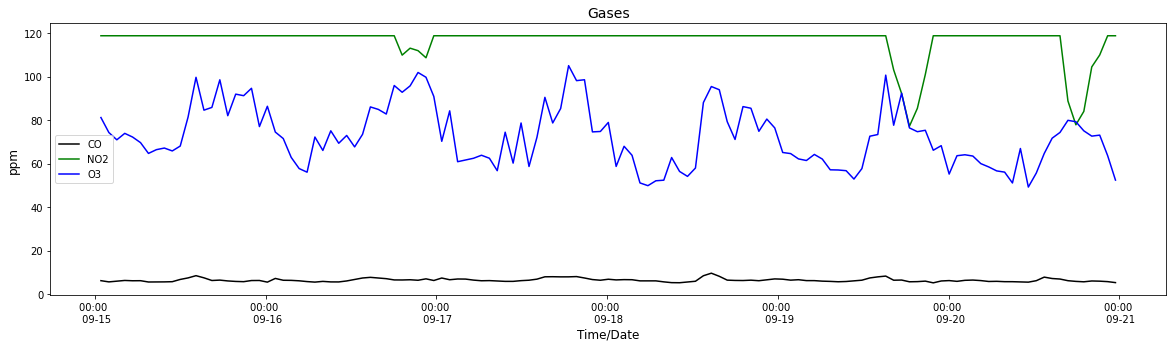

In [482]:
fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_S4_new.index, df_S4_new["CO (ppm)"], label= "CO", color="black")
ax.plot(df_S4_new.index, df_S4_new["NO2 (ppm)"], label= "NO2", color="green")
ax.plot(df_S4_new.index, df_S4_new["O3 (ppm)"], label= "O3", color="blue")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax.set_ylabel("ppm", fontsize=12, color='k')
ax.set_xlabel("Time/Date", fontsize=12, color='k')
ax.set_title("Gases", fontsize=14, color='k')
plt.legend(loc=0)
plt.show()

In [57]:
def gas_plots(data=[df_S4_new, df_vaisa_new],labels=["Simple", "Vaisala"],variable="CO (ppm)",colors=["blue", "black"],
              unit="ppm",name = "", figsize=(20,5)):
    fig = plt.figure(figsize=figsize)
    shape_figs = (1,1)
    gs = gridspec.GridSpec(shape_figs[0],shape_figs[1])
    ax=fig.add_subplot(111)
    for lab, df, col in zip(labels, data, colors):
        ax.plot(df.index, df[variable], label= lab, color=col)
        ax.set_title(name, fontsize=14, color="k")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
    ax.set_ylabel(unit, fontsize=12, color='k')
    ax.set_xlabel("Hora/Fecha", fontsize=12, color='k')
    plt.legend()
    plt.show()

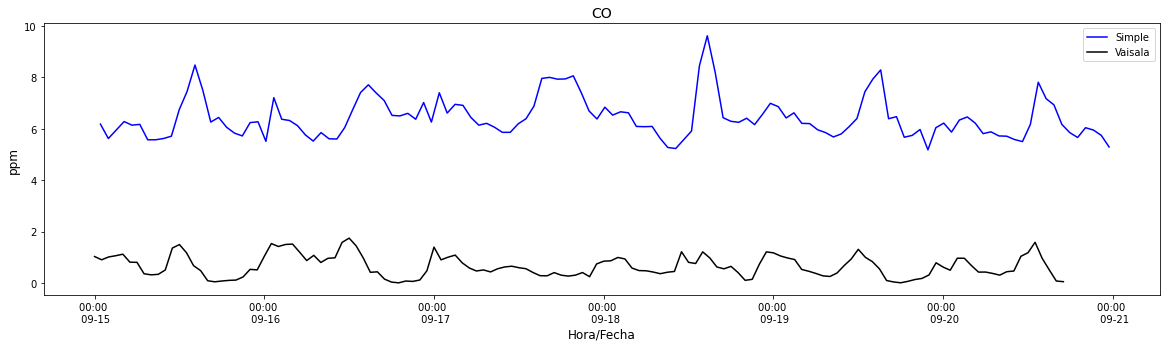

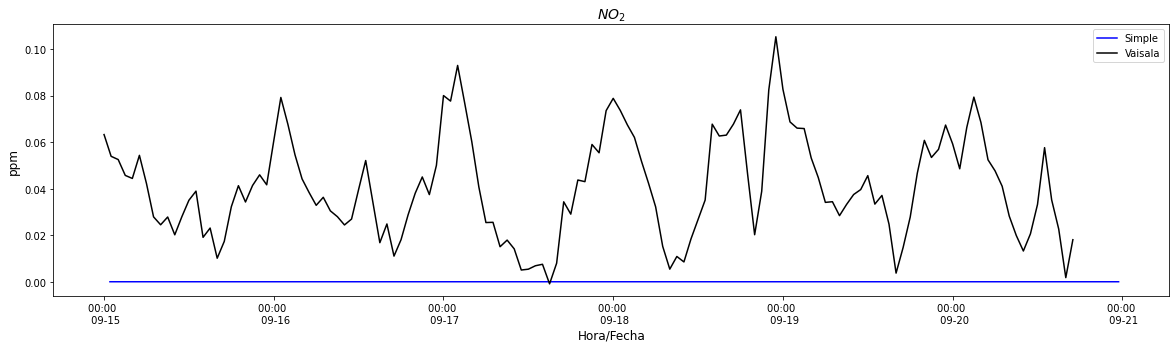

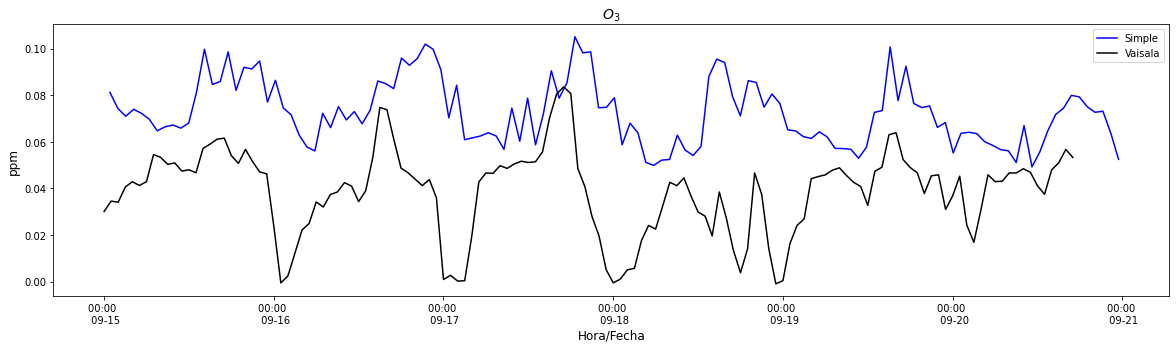

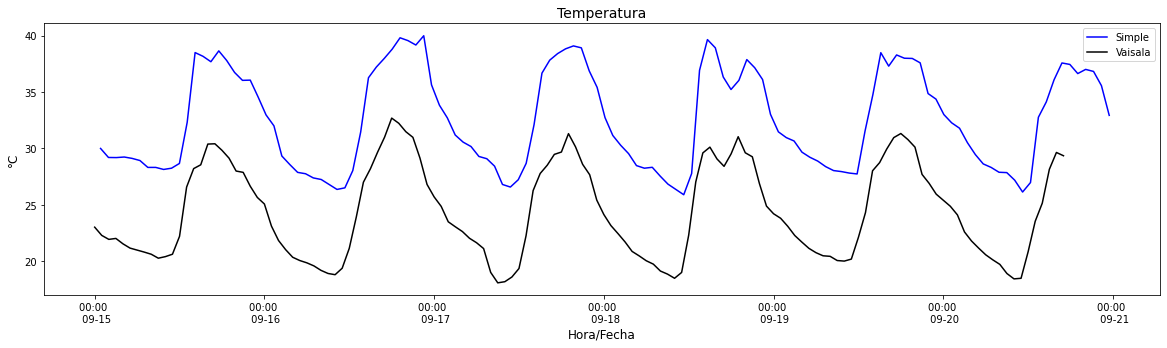

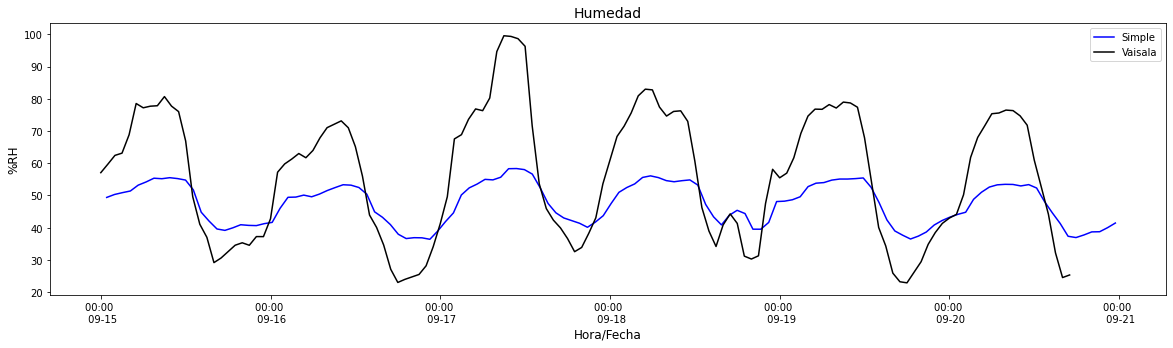

In [62]:
gas_plots(variable="CO [ppm]", name = "CO")
gas_plots(variable="NO2 [ppm]", name = r"$NO_2$")
gas_plots(variable="O3 [ppm]", name = r"$O_3$")
gas_plots(variable="TEMP (C)", unit="°C", name = "Temperatura")
gas_plots(variable="HUM (%RH)", unit="%RH", name ="Humedad")

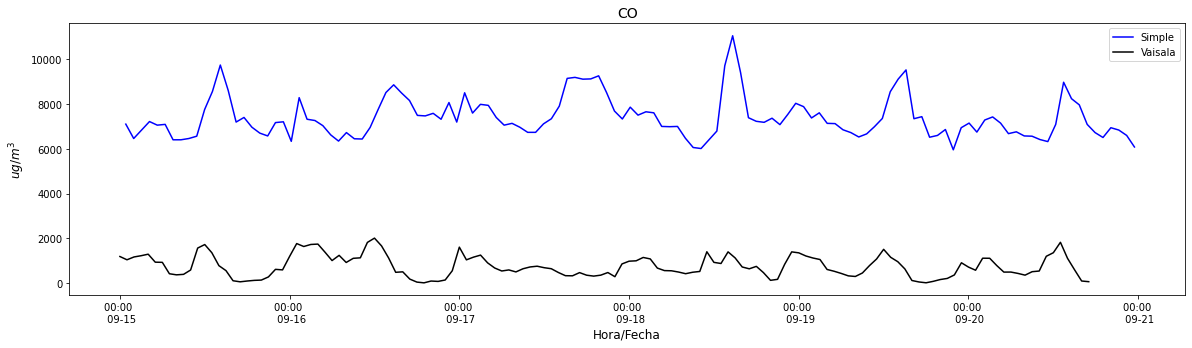

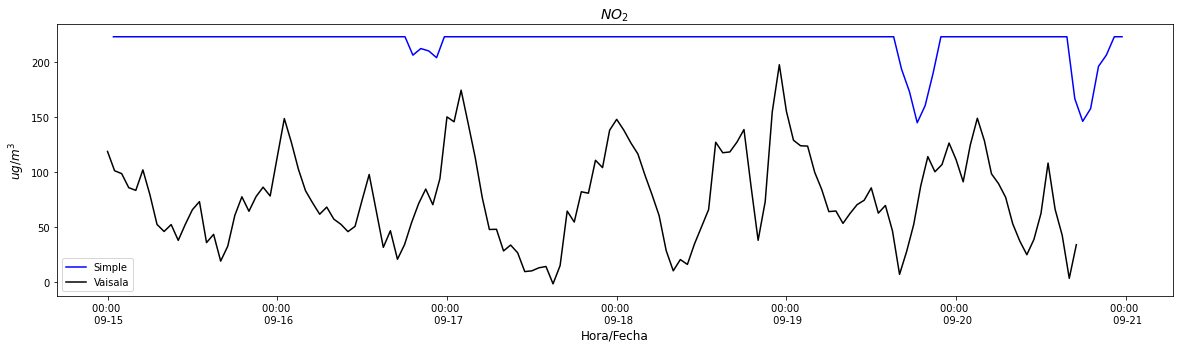

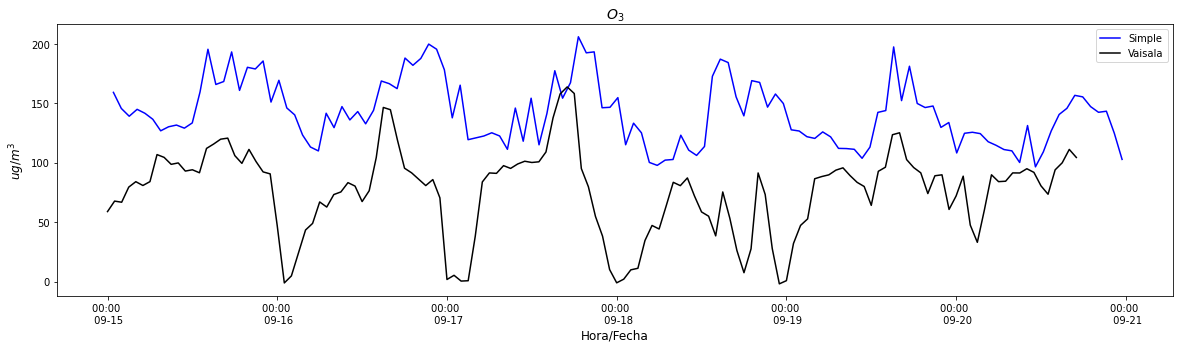

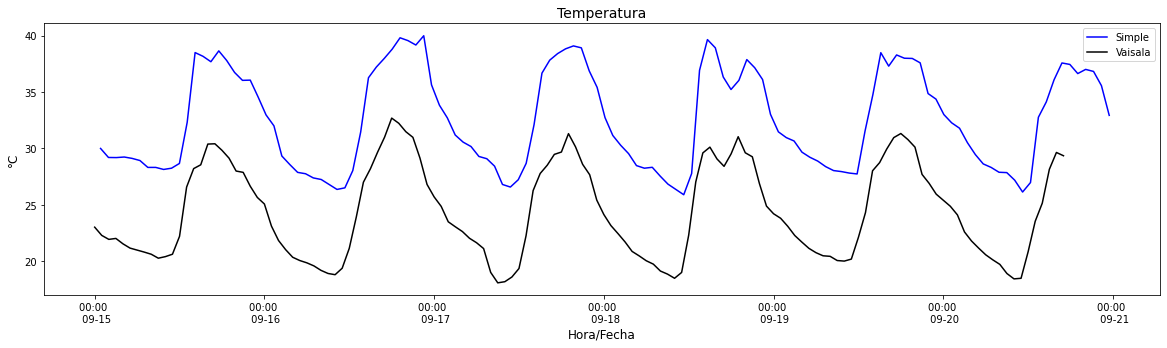

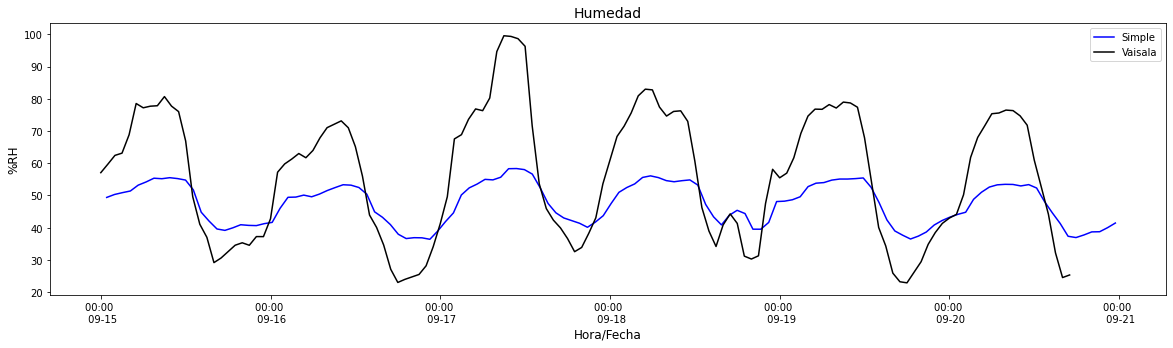

In [40]:
gas_plots(variable="CO (ug/m3)", unit=r"$ug/m^3$", name="CO")
gas_plots(variable="NO2 (ug/m3)", unit=r"$ug/m^3$", name=r"$NO_2$")
gas_plots(variable="O3 (ug/m3)", unit=r"$ug/m^3$", name=r"$O_3$")
gas_plots(variable="TEMP (C)", unit="°C", name="Temperatura")
gas_plots(variable="HUM (%RH)", unit="%RH", name="Humedad")

In [383]:
#Corregimos variable que no necesitan suavizar
#Ajustar datos 
# Desde:
if df_S4_new.index[0] > df_vaisa_new.index[0]:
  desde = df_S4_new.index[0]
else:
  desde = df_vaisa_new.index[0]
# Hasta:
if df_S4_new.index[-1] < df_vaisa_new.index[-1]:
  hasta = df_S4_new.index[-1]
else:
  hasta = df_vaisa_new.index[-1]

vec_simple = ['CO (ug/m3)','O3 (ug/m3)', 'NO2 (ug/m3)', "NOx (ug/m3)", "Temperatura (°C)", "Humedad (%RH)"]

Vec_Vaisala = ['CO (ug/m3)','O3 (ug/m3)', 'NO2 (ug/m3)', 'NO (ug/m3)', "Temperatura (°C)", "Humedad (%RH)"]

df_S4_Corregido = pd.DataFrame()

for i,var in enumerate(vec_simple):
    print(var)
    s = df_S4_new[var].loc[(df_S4_new.index >= desde) & (df_S4_new.index <= hasta)].values
    v = df_vaisa_new[Vec_Vaisala[i]].loc[(df_vaisa_new.index >= desde) & (df_vaisa_new.index <= hasta)].values
    L = max(s.size,v.size)
    s.resize(L), v.resize(L)
    m = np.nanstd(v)/np.nanstd(s)
    b = np.nanmean(v) - np.nanstd(v)/np.nanstd(s)*np.nanmean(s)
    error = v - (m*s+b)
    rms = np.sqrt(np.nanmean(error**2))
    df_S4_Corregido[var] = m*df_S4_new[var]+b+np.nanmean(error)
# df_S4_Corregido.index = df_vaisa_new.loc[(df_vaisa_new.index >= desde) & (df_vaisa_new.index <= hasta)].index

CO (ug/m3)
O3 (ug/m3)
NO2 (ug/m3)
NOx (ug/m3)
Temperatura (°C)
Humedad (%RH)


In [87]:
#Corregimos variable que no necesitan suavizar
if df_S4_new.index[0] > df_vaisa_new.index[0]:
  desde = df_S4_new.index[0]
else:
  desde = df_vaisa_new.index[0]
# Hasta:
if df_S4_new.index[-1] < df_vaisa_new.index[-1]:
  hasta = df_S4_new.index[-1]
else:
  hasta = df_vaisa_new.index[-1]

vec_simple = ['CO [ppm]','O3 [ppm]', 'NO2 [ppm]', "NOx [ppm]", "TEMP (C)", "HUM (%RH)"]

Vec_Vaisala = ['CO [ppm]','O3 [ppm]', 'NO2 [ppm]', "NO [ppm]", "TEMP (C)", "HUM (%RH)"]

df_S4_Corregido2 = pd.DataFrame()

for i,var in enumerate(vec_simple):
#     print(var)
    s = df_S4_new[var].loc[(df_S4_new.index >= desde) & (df_S4_new.index <= hasta)].values
    v = df_vaisa_new[Vec_Vaisala[i]].loc[(df_vaisa_new.index >= desde) & (df_vaisa_new.index <= hasta)].values
    L = max(s.size,v.size)
    s.resize(L), v.resize(L)
    m = np.nanstd(v)/np.nanstd(s)
    b = np.nanmean(v) - np.nanstd(v)/np.nanstd(s)*np.nanmean(s)
    error = v - (m*s+b)
    rms = np.sqrt(np.nanmean(error**2))
    df_S4_Corregido2[var] = m*df_S4_new[var]+b+np.nanmean(error)
    print(var, "pendiente", m, "intercepto", b, "error", np.nanmean(error))
# S4_Corregido2.index = df_vaisa_new.loc[(df_vaisa_new.index >= desde) & (df_vaisa_new.index <= hasta)].index

CO [ppm] pendiente 0.199389203722669 intercepto -0.5077818754493443 error 8.427970405913597e-17
O3 [ppm] pendiente 0.7118191671553142 intercepto -0.007675913082983536 error -6.4830541583950745e-18
NO2 [ppm] pendiente 600.5696367970447 intercepto -0.02263332890446379 error 8.103817697993843e-19
NOx [ppm] pendiente 0.04946459298476378 intercepto -0.0305444944562129 error -9.724581237592612e-18
TEMP (C) pendiente 0.39040137087822285 intercepto 13.034181911884504 error 1.2447463984118544e-15
HUM (%RH) pendiente 1.2764418119200358 intercepto 1.3279097668697304 error -2.4894927968237088e-15


KeyError: 'O3 (ug/m3)'

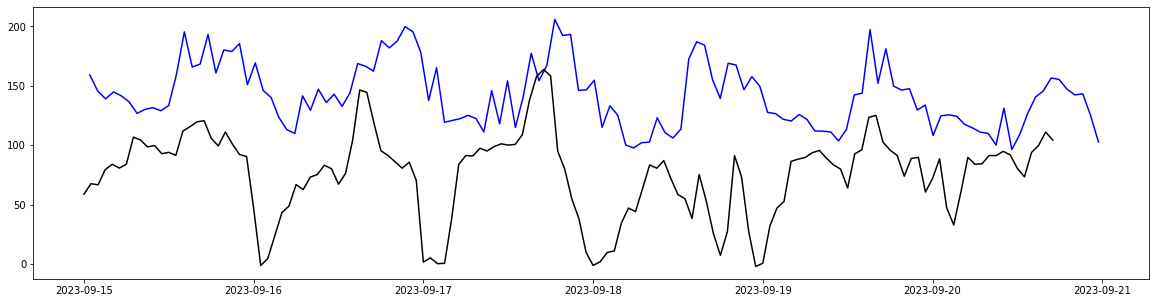

In [86]:
gas_plots(data=[df_S4_new, df_vaisa_new, df_S4_Corregido2], labels=["Simple", "Vaisala", "Simple Corregida"],
         variable="O3 (ug/m3)",colors=["blue", "black", "green"], unit=r"$ug/m^3$")
gas_plots(data=[df_S4_new, df_vaisa_new, df_S4_Corregido2], labels=["Simple", "Vaisala", "Simple Corregida"],
         variable="CO (ug/m3)",colors=["blue", "black", "green"], unit=r"$ug/m^3$")
gas_plots(data=[df_S4_new, df_vaisa_new, df_S4_Corregido2], labels=["Simple", "Vaisala", "Simple Corregida"],
         variable="NO2 (ug/m3)",colors=["blue", "black", "green"], unit="ug/m3")
gas_plots(data=[df_S4_new, df_vaisa_new, df_S4_Corregido2], labels=["Simple", "Vaisala", "Simple Corregida"],
         variable="Temperatura (°C)",colors=["blue", "black", "green"], unit="°C")
gas_plots(data=[df_S4_new, df_vaisa_new, df_S4_Corregido2], labels=["Simple", "Vaisala", "Simple Corregida"],
         variable="Humedad (%RH)",colors=["blue", "black", "green"], unit="%RH")

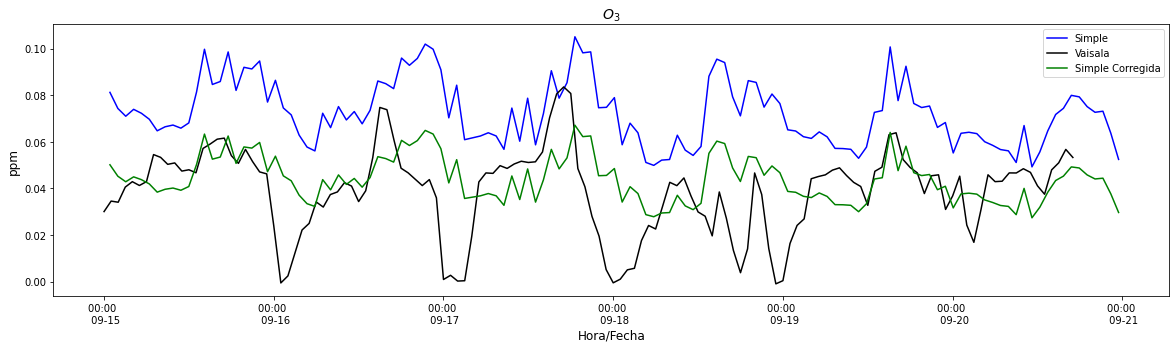

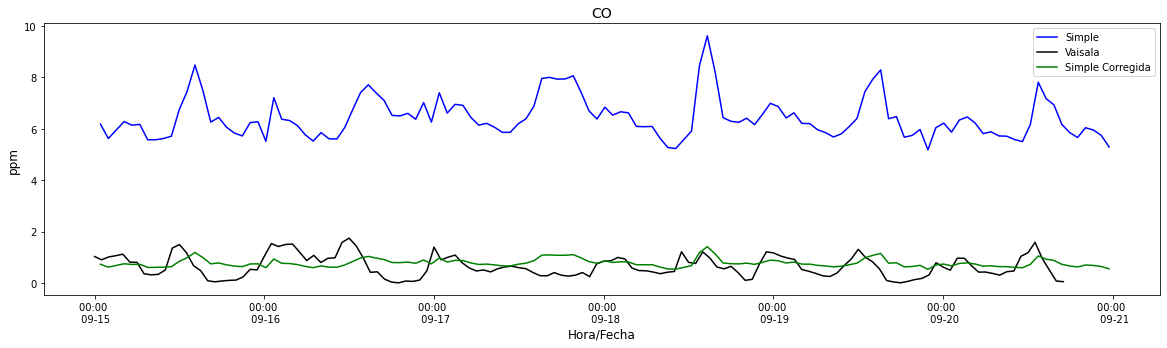

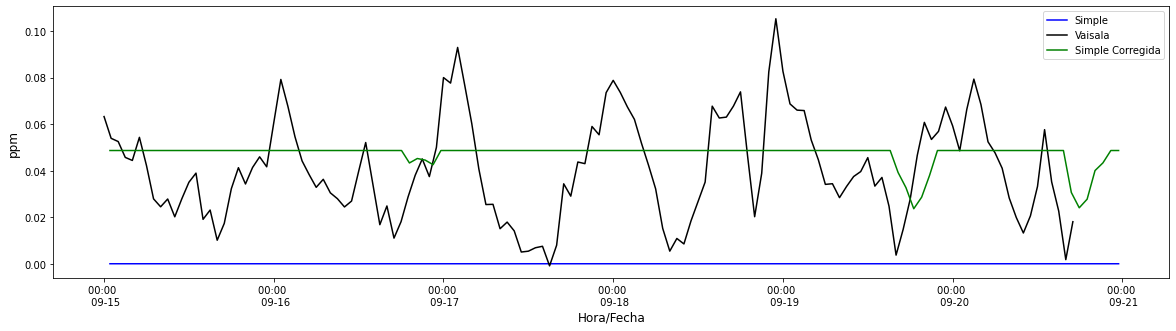

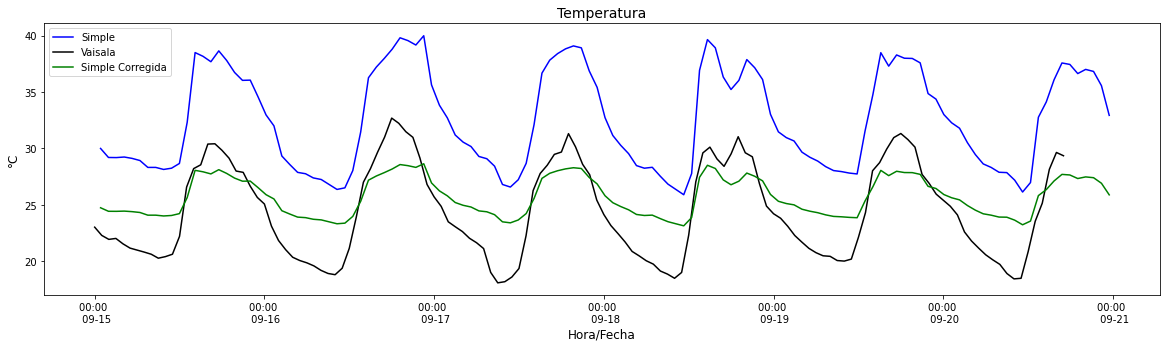

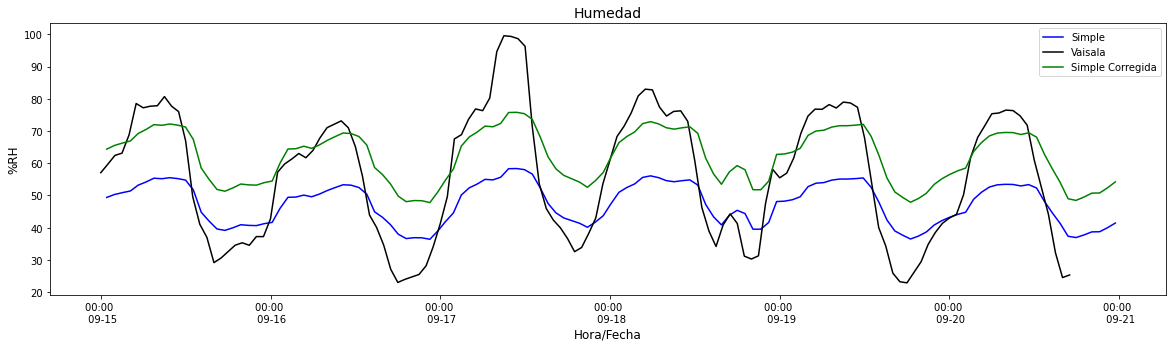

In [69]:
gas_plots(data=[df_S4_new, df_vaisa_new, df_S4_Corregido2], labels=["Simple", "Vaisala", "Simple Corregida"],
         variable="O3 [ppm]",colors=["blue", "black", "green"], unit="ppm", name = r"$O_3$")
gas_plots(data=[df_S4_new, df_vaisa_new, df_S4_Corregido2], labels=["Simple", "Vaisala", "Simple Corregida"],
         variable="CO [ppm]",colors=["blue", "black", "green"], unit="ppm", name = "CO")
gas_plots(data=[df_S4_new, df_vaisa_new, df_S4_Corregido2], labels=["Simple", "Vaisala", "Simple Corregida"],
         variable="NO2 [ppm]",colors=["blue", "black", "green"], unit="ppm")
gas_plots(data=[df_S4_new, df_vaisa_new, df_S4_Corregido2], labels=["Simple", "Vaisala", "Simple Corregida"],
         variable="TEMP (C)",colors=["blue", "black", "green"], unit="°C", name="Temperatura")
gas_plots(data=[df_S4_new, df_vaisa_new, df_S4_Corregido2], labels=["Simple", "Vaisala", "Simple Corregida"],
         variable="HUM (%RH)",colors=["blue", "black", "green"], unit="%RH", name = "Humedad")

In [84]:
def column_auto_shift(df_to_move, reference_df, column_name, unit, name=""):
    shift_value = np.mean(reference_df[column_name]) - np.mean(df_to_move[column_name])
    print("Shift", round(shift_value,2))
    df_moved = df_to_move.copy()
    df_moved[column_name] = df_to_move[column_name] + shift_value
    rms1 = np.sqrt(np.mean(df_moved[column_name]**2))
    rms2 = np.sqrt(np.mean(reference_df[column_name]**2))
    rms = rms2 / rms1
    print("rms", rms)
    df_moved[column_name] = df_moved[column_name]*rms
    for j in range(0,len(df_moved[column_name])):
        if df_moved[column_name][j]<0:
            df_moved[column_name][j]=0
    print("Average RMS", round(np.mean(df_moved[column_name]),2))
    print("Max RMS", round(np.max(df_moved[column_name]),2), np.argmax(df_moved[column_name]))
    print("Min RMS", round(np.min(df_moved[column_name]),2), np.argmin(df_moved[column_name]))
    fig = plt.figure(figsize=(20,5))
    ax=fig.add_subplot(111)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
    ax.plot(reference_df.index, reference_df[column_name], label="Vaisala", color="k")
    ax.plot(df_to_move.index, df_to_move[column_name], label="Simple", color="b")
    ax.plot(df_moved.index, df_moved[column_name], label="Simple + RMS", color="g")
    ax.set_title(name)
    plt.legend()
    ax.set_xlabel("Hora/Fecha")
    ax.set_ylabel(unit)
    plt.show()

    return df_moved[column_name], fig

Shift 0.04
rms 1.132297054207966
Average RMS 0.05
Max RMS 0.05 2023-09-15 00:50:00
Min RMS 0.05 2023-09-19 18:30:00


C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return bound(*args, **kwds)
C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return bound(*args, **kwds)


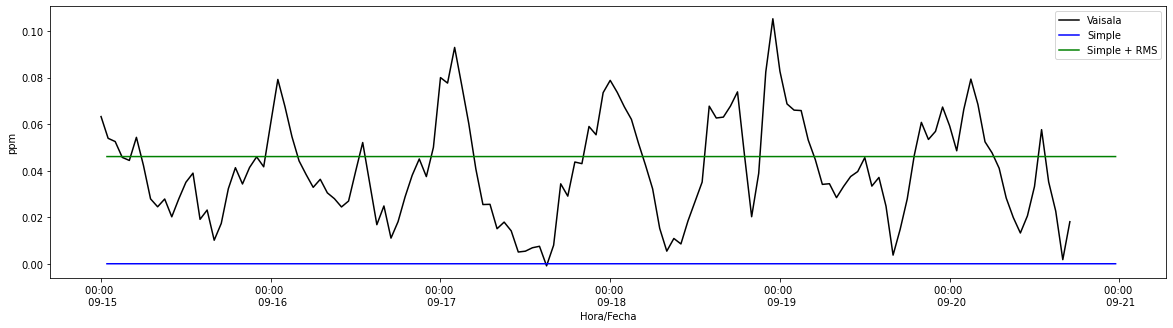

Shift -5.77
rms 0.755832860580499
Average RMS 0.52
Max RMS 2.91 2023-09-18 14:39:00
Min RMS 0.0 2023-09-15 01:57:00


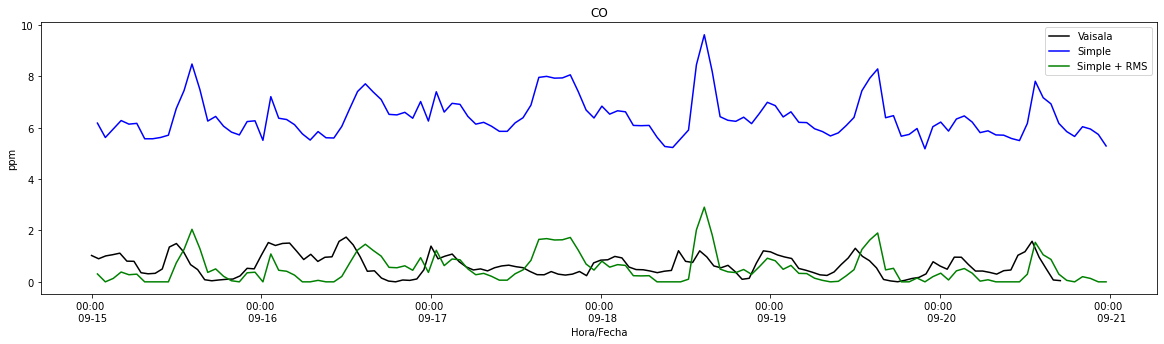

Shift -0.03
rms 1.0424108860700965
Average RMS 0.04
Max RMS 0.07 2023-09-17 18:35:00
Min RMS 0.02 2023-09-20 11:13:00


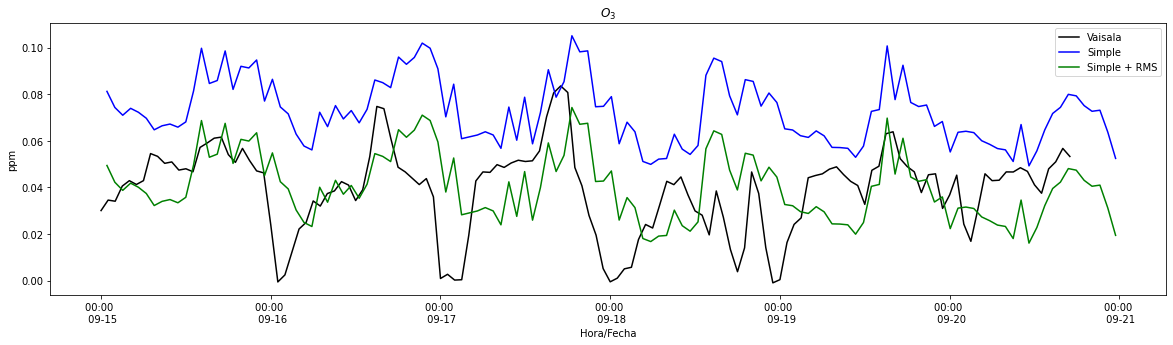

Shift -8.13
rms 0.9986734918798236
Average RMS 24.32
Max RMS 31.8 2023-09-16 22:32:00
Min RMS 17.74 2023-09-18 11:18:00


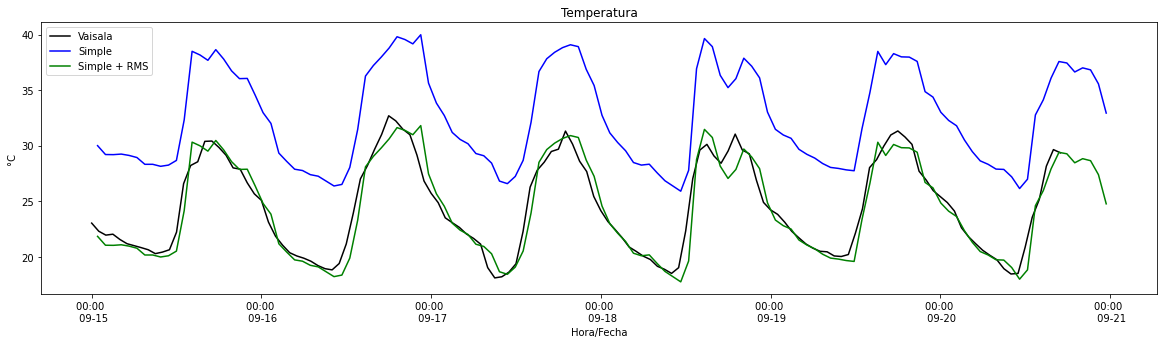

Shift 8.75
rms 1.0541723382705244
Average RMS 59.31
Max RMS 70.76 2023-09-17 10:47:00
Min RMS 47.6 2023-09-16 22:32:00


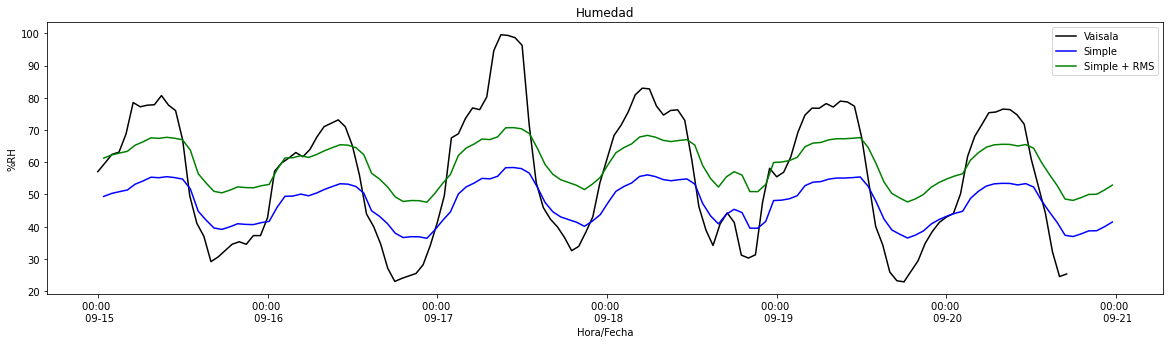

In [85]:
no2 = column_auto_shift(df_S4_new, df_vaisa_new, "NO2 [ppm]", "ppm")
co = column_auto_shift(df_S4_new, df_vaisa_new, "CO [ppm]", "ppm", "CO")
o3 = column_auto_shift(df_S4_new, df_vaisa_new, "O3 [ppm]", "ppm", r"$O_3$")
temp = column_auto_shift(df_S4_new, df_vaisa_new, "TEMP (C)", "°C", "Temperatura")
hum = column_auto_shift(df_S4_new, df_vaisa_new, "HUM (%RH)", "%RH", "Humedad")

In [439]:
df_S4_new.head(0)

,PM01 (ppm),PM2_5 (ppm),PM10 (ppm),CO (ppm),O3 (ppm),NH3 (ppm),NOx (ppm),NO2 (ppm),Temperatura (°C),Humedad (%RH),CO (ug/m3),NO2 (ug/m3),NOx (ug/m3),O3 (ug/m3)
Date,,,,,,,,,,,,,,


In [441]:
columns = calculate_column_means(df_S4_new)
for variable in columns:
    if variable in pollutant_ranges:
        aqi = calculate_aqi(columns[variable], variable, pollutant_ranges)
        color = aqi_color(aqi)
        print("ICA", variable, round(aqi,2), color)

ICA PM2_5 (ppm) 34.54 ('lightgreen', 'Good')
ICA PM10 (ppm) 8.72 ('lightgreen', 'Good')
ICA CO (ppm) 69.64 ('yellow', 'Moderate')
ICA O3 (ppm) 105.44 ('orange', 'Unhealthy for Sensitive Groups')
ICA NO2 (ppm) 103.0 ('orange', 'Unhealthy for Sensitive Groups')


In [190]:
columns = calculate_column_means(df_vaisa_new)
for variable in columns:
    if variable in pollutant_ranges:
        aqi = calculate_aqi(columns[variable], variable, pollutant_ranges)
        color = aqi_color(aqi)
        print("ICA", variable, round(aqi,2), color)

ICA NO2 (ppm) 0.04 ('lightgreen', 'Good')
ICA CO (ppm) 7.4 ('lightgreen', 'Good')
ICA O3 (ppm) 0.04 ('lightgreen', 'Good')


In [356]:
columns = calculate_column_means(df_S4_Corregido2)
for variable in columns:
    if variable in pollutant_ranges:
        aqi = calculate_aqi(columns[variable], variable, pollutant_ranges)
        color = aqi_color(aqi)
        print("ICA", variable, round(aqi,2), color)

ICA CO (ppm) 7.37 ('lightgreen', 'Good')
ICA O3 (ppm) 0.04 ('lightgreen', 'Good')
ICA NO2 (ppm) 0.04 ('lightgreen', 'Good')


In [510]:
print("Simple")
for var in df_S4_new.columns:
    print(var)
    simple_min = np.min(df_S4_new[var])
    simple_argmin = np.argmin(df_S4_new[var])
    simple_max = np.max(df_S4_new[var])
    simple_argmax = np.argmax(df_S4_new[var])
    simple_avg = np.mean(df_S4_new[var])
    print("Min", round(simple_min,2), simple_argmin)
    print("Max", round(simple_max,2), simple_argmax)
    print("Avg", round(simple_avg,2))

Simple
PM01 (ppm)
Min 0.0 2023-09-15 17:33:00
Max 13.76 2023-09-18 14:39:00
Avg 6.13
PM2_5 (ppm)
Min 0.22 2023-09-15 17:33:00
Max 17.2 2023-09-18 14:39:00
Avg 8.29
PM10 (ppm)
Min 0.22 2023-09-15 17:33:00
Max 19.14 2023-09-19 11:49:00
Avg 9.42
CO (ppm)
Min 5.18 2023-09-19 21:51:00
Max 9.62 2023-09-18 14:39:00
Avg 6.42
O3 (ppm)
Min 49.23 2023-09-20 11:13:00
Max 105.07 2023-09-17 18:35:00
Avg 72.52
NH3 (ppm)
Min 0.01 2023-09-15 00:50:00
Max 0.02 2023-09-15 13:05:00
Avg 0.01
NOx (ppm)
Min 1.61 2023-09-18 14:39:00
Max 2.06 2023-09-19 21:51:00
Avg 1.88
NO2 (ppm)
Min 77.2 2023-09-19 18:30:00
Max 118.81 2023-09-15 00:50:00
Avg 116.52
Temperatura (°C)
Min 25.9 2023-09-18 11:18:00
Max 39.98 2023-09-16 22:32:00
Avg 32.48
Humedad (%RH)
Min 36.4 2023-09-16 22:32:00
Max 58.37 2023-09-17 10:47:00
Avg 47.52
CO (ug/m3)
Min 5957.0 2023-09-19 21:51:00
Max 11063.0 2023-09-18 14:39:00
Avg 7388.26
NO2 (ug/m3)
Min 145.14 2023-09-19 18:30:00
Max 223.36 2023-09-15 00:50:00
Avg 219.06
NOx (ug/m3)
Min 3078.32 20

In [511]:
print("Vaisala")
for var in df_vaisa_new.columns:
    print(var)
    vaisa_min = np.min(df_vaisa_new[var])
    vaisa_argmin = np.argmin(df_vaisa_new[var])
    vaisa_max = np.max(df_vaisa_new[var])
    vaisa_argmax = np.argmax(df_vaisa_new[var])
    vaisa_avg = np.mean(df_vaisa_new[var])
    print("Min", round(vaisa_min,2), vaisa_argmin)
    print("Max", round(vaisa_max,2), vaisa_argmax)
    print("Avg", round(vaisa_avg,2))

Vaisala
NO2 (ug/m3)
Min -1.47 2023-09-17 15:00:00
Max 197.92 2023-09-18 23:00:00
Avg 76.58
CO (ug/m3)
Min 1.43 2023-09-16 19:00:00
Max 2003.47 2023-09-16 12:00:00
Avg 748.52
O3 (ug/m3)
Min -1.92 2023-09-18 23:00:00
Max 163.74 2023-09-17 17:00:00
Avg 75.86
NO (ug/m3)
Min 0.88 2023-09-16 18:00:00
Max 152.45 2023-09-18 11:00:00
Avg 64.66
Temperatura (°C)
Min 18.1 2023-09-17 09:00:00
Max 32.69 2023-09-16 18:00:00
Avg 24.35
Humedad (%RH)
Min 22.88 2023-09-19 18:00:00
Max 99.6 2023-09-17 09:00:00
Avg 56.27
PRES (hPa)
Min 847.98 2023-09-18 21:00:00
Max 853.86 2023-09-17 13:00:00
Avg 851.0
NO2 (ppm)
Min -0.78 2023-09-17 15:00:00
Max 105.27 2023-09-18 23:00:00
Avg 40.73
NO (ppm)
Min 0.0 2023-09-16 18:00:00
Max 0.12 2023-09-18 11:00:00
Avg 0.05
CO (ppm)
Min 0.0 2023-09-16 19:00:00
Max 1.74 2023-09-16 12:00:00
Avg 0.65
O3 (ppm)
Min -0.98 2023-09-18 23:00:00
Max 83.54 2023-09-17 17:00:00
Avg 38.71


In [518]:
def column_auto_shift1(df_to_move, reference_df, column_name):
    shift_value = np.mean(reference_df[column_name]) - np.mean(df_to_move[column_name])
#     print("Shift", round(shift_value,2))
    df_moved = df_to_move.copy()
    df_moved[column_name] = df_to_move[column_name] + shift_value
    rms1 = np.sqrt(np.mean(df_moved[column_name]**2))
    rms2 = np.sqrt(np.mean(reference_df[column_name]**2))
    rms = rms2 / rms1
    df_moved[column_name] = df_moved[column_name]*rms
    for j in range(0,len(df_moved[column_name])):
        if df_moved[column_name][j]<0:
            df_moved[column_name][j]=0
            
    return df_moved[column_name]

In [571]:
S4_Corregido = pd.DataFrame()
S4_Corregido["O3 (ppm)"] = column_auto_shift1(df_S4_new, df_vaisa_new, "O3 (ppm)")
S4_Corregido["CO (ppm)"] = column_auto_shift1(df_S4_new, df_vaisa_new, "CO (ppm)")
S4_Corregido["Temperatura (°C)"] = column_auto_shift1(df_S4_new, df_vaisa_new, "Temperatura (°C)")
S4_Corregido["Humedad (%RH)"] = column_auto_shift1(df_S4_new, df_vaisa_new, "Humedad (%RH)")
S4_Corregido.index = df_S4_new.index

In [551]:
np.mean(df_S4_new["O3 (ppm)"]["2023-09-15 16":"2023-09-15 23"][0])

85.86

In [556]:
pollutant_ranges = {
        'CO (ppm)': [(0, 4.4), (4.5, 9.4), (9.5, 12.4), (12.5, 15.4), (15.5, 30.4), (30.5, 40.4), (40.5, 50.4)],
        'NO2 (ppm)': [(0, 53), (54, 100), (101, 360), (361, 649), (650, 1249), (1250, 1649), (1650, 2049)],
        'O3 (ppm)': [(0, 54), (54, 70), (70, 85), (85, 105), (105, 200), (200, 404), (404, 504)],
        'PM2_5 (ppm)': [(0, 12), (12.1, 35.4), (35.5, 55.4), (55.5, 150.4), (150.5, 250.4), (250.5, 350.4), (350.5, 500.4)],
        'PM10 (ppm)': [(0, 54), (55, 154), (155, 254), (255, 354), (355, 424), (425, 504), (505, 604)]
    }

In [558]:
def calculate_column_means(dataframe):
    # dataframe.drop("Fecha", axis=1, inplace=True)
#     dataframe.dropna(inplace=True)
    column_means = dataframe.mean(axis=0)
    result_dict = column_means.to_dict()
    
    return result_dict

def calculate_aqi(concentration, pollutant_name:str, pollutant_ranges:dict):

    # Select the appropriate concentration range for the pollutant
    ranges = pollutant_ranges.get(pollutant_name, [])
    if not ranges:
        raise ValueError(f"Invalid pollutant name: {pollutant_name}")

    # Determine the AQI category based on the concentration
    for i, (low, high) in enumerate(ranges):
        if low <= concentration <= high:
            index_low, index_high = i * 50, (i + 1) * 50
            break
    else:
        raise ValueError(f"Concentration value ({concentration}) outside the defined range.")
    
    aqi = ((index_high - index_low) / (high - low)) * (concentration - low) + index_low

    return aqi

def aqi_color(aqi):
    color_categories = {
        (0, 50): ('Good', 'lightgreen'),
        (50.1, 100): ('Moderate', 'yellow'),
        (100.1, 150): ('Unhealthy for Sensitive Groups', 'orange'),
        (150.1, 200): ('Unhealthy', 'red'),
        (200.1, 300): ('Very Unhealthy', 'purple'),
        (300.1, float('inf')): ('Hazardous', 'darkpurple')
    }

    for (low, high), (title, color) in color_categories.items():
        if low <= aqi <= high:
            return color, title

In [564]:
aqi = calculate_aqi(np.mean(df_S4_new["O3 (ppm)"]["2023-09-20 02":"2023-09-20 09"][0]), "O3 (ppm)", pollutant_ranges)
color = aqi_color(aqi)
print("Simple ICA", "O3", round(aqi,2), color)
aqi = calculate_aqi(np.mean(df_vaisa_new["O3 (ppm)"]["2023-09-20 02":"2023-09-20 09"][0]), "O3 (ppm)", pollutant_ranges)
color = aqi_color(aqi)
print("Vaisala ICA", "O3", round(aqi,2), color)
aqi = calculate_aqi(np.mean(S4_Corregido["O3 (ppm)"]["2023-09-20 02":"2023-09-20 09"][0]), "O3 (ppm)", pollutant_ranges)
color = aqi_color(aqi)
print("Corregido ICA", "O3", round(aqi,2), color)

Simple ICA O3 81.5 ('yellow', 'Moderate')
Vaisala ICA O3 22.44 ('lightgreen', 'Good')
Corregido ICA O3 29.21 ('lightgreen', 'Good')


In [578]:
print("Simple")
for var in S4_Corregido:
    simple_avg = np.mean(df_S4_new[var]["2023-09-20"])
    print(var, round(simple_avg,2))
    
print("Vaisala")
for var in S4_Corregido:
    siata_avg = np.mean(df_vaisa_new[var]["2023-09-20"])
    print(var, round(siata_avg,2))
    
print("Simple Corregida")
for var in S4_Corregido.columns:
    simplec_avg = np.mean(S4_Corregido[var]["2023-09-20"])
    print(var, round(simplec_avg,2))

Simple
O3 (ppm) 63.98
CO (ppm) 6.09
Temperatura (°C) 32.13
Humedad (%RH) 45.84
Vaisala
O3 (ppm) 42.31
CO (ppm) 0.64
Temperatura (°C) 22.94
Humedad (%RH) 57.18
Simple Corregida
O3 (ppm) 31.44
CO (ppm) 0.28
Temperatura (°C) 23.97
Humedad (%RH) 57.55
